<a href="https://colab.research.google.com/github/heath-barnett/chem3020/blob/main/basic_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
init_printing(use_unicode=True)
x, y, z = symbols('x, y, z')

# Basic Plotting with Sympy

Plotting is fairly straight forward. Sympy uses the `plot(expr, range, kwargs)` function for single variable expressions.

Where,

`expr` is the function or expression your want to plot.

`range` is the variable range that you want to plot over on the x-axis it is in the form of `(x,xmin,xmax)`.

`kwargs` refers to keyword arguments and these will manipulate the plot to look a certain way. More on these later. These are always optional.

For single variable functions you can omit the range and kwargs entirely and sympy will try and guess the best values for you. The plot that is automatically generated may not look the best but it is an excellent place to start.

It is also important to understand that plotting in sympy is not meant to produce publication quality figures. We have other, better, tools for that, sympy plotting is meant to help us work on the concepts.

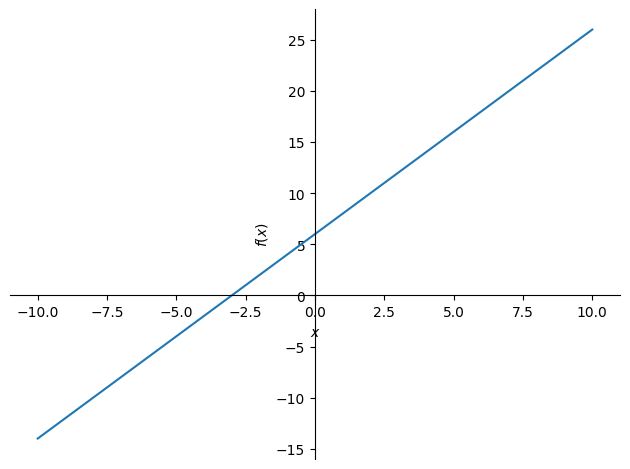

In [ ]:
f = 2*x + 6
p1 = plot(f)

# Manipulating Plots

Optional kwargs (keyword arguments) may be specified in plot() function to alter its appearence. Some of them:

`line_color='color'` color of line to be plotted, stick to the basic colors black/red/blue etc..

`title=`  a string to be displayed as title

`xlabel=` a string to be displayed as label for X axis

`ylabel=` a string to be displayed as label for y axis

`ylim=(min,max)` specify the minimum and maximum y-axis (vertical) values

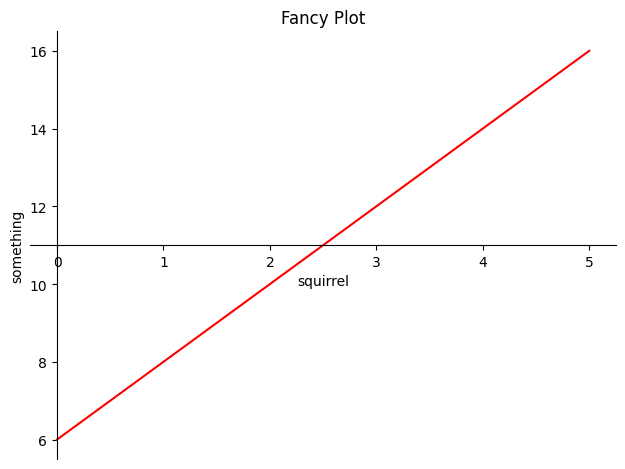

In [ ]:
p2 = plot(f, (x,0,5),line_color='red',title='Fancy Plot',xlabel='squirrel',ylabel='something')

# Multiple Plots Are Easy

To draw multiple plots (in the same range), give multiple expressions prior to the range, seperated by commas. Sympy will automatically try and give each expression its own unique color.

If you specify the kwargs `legend=True` sympy will provide a legend with each expression.

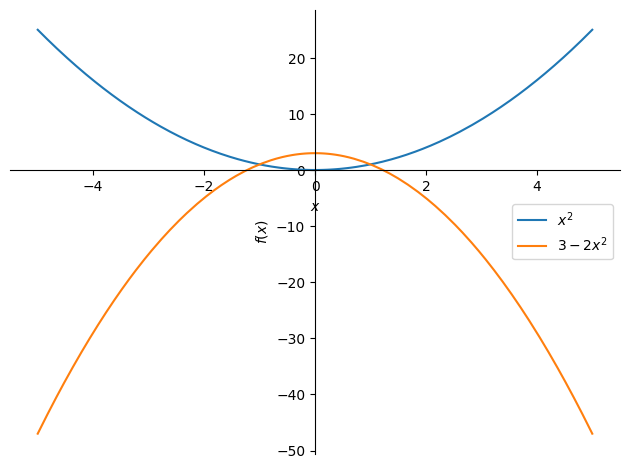

In [ ]:
g = x**2
h = -2*x**2+3
p3 = plot(g,h,(x,-5,5),legend = True)

# Multiple Plot Colors
Changing the plot colors in a graph with multiple expressions is a little non-intuitive see below:

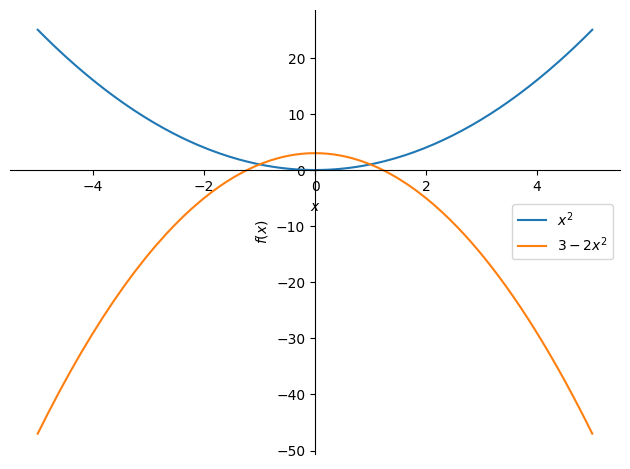

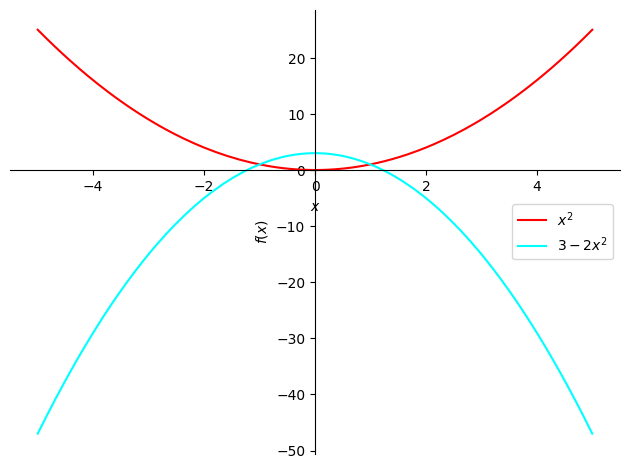

In [ ]:
g = x**2
h = -2*x**2+3
p3 = plot(g,h,(x,-5,5),legend = True)
p3[0].line_color = 'red' # p3[0] is the first expression listed g(x)
p3[1].line_color = 'cyan'# p3[1] is the second expression listed h(x)
p3.show()

# Advanced Plots

Sympy has a few more advanced plots built in such as:

`plot3d()`, `plot3d_parametric_line()`, `plot3d_parameteric_surface()`

The syntax of all of these functions are very similar to `plot()`

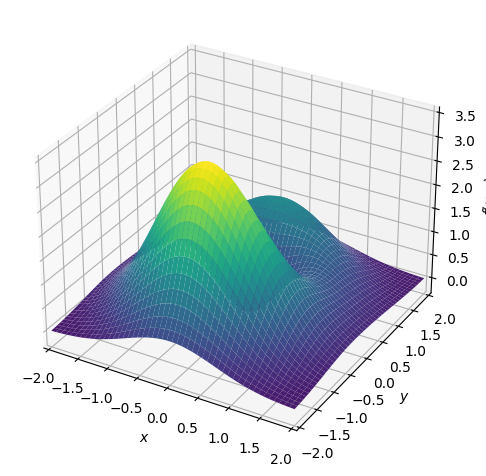

In [5]:
from sympy.plotting import plot3d
f = (x**2+2.5*y**2-y)*E**(1-(x**2+y**2))
plot3d(f,(x,-2,2),(y,-2,2))

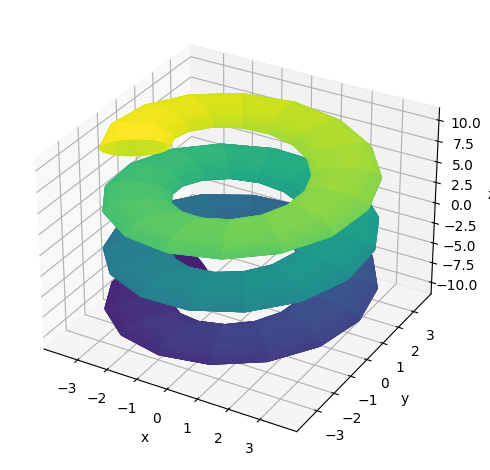

In [19]:
from sympy.plotting import plot3d_parametric_surface
u,v=symbols("u,v")
x=cos(u)*(cos(v)+3)
y=sin(u)*(cos(v)+3)
z=sin(v)+u
plot3d_parametric_surface(x,y,z,(u,0,pi),(v,0,pi),(z,0,pi))

### Even More Advanced Plots!

If you want really more advanced plots or better looking plots then we need to use something defined for specifically for plotting, which sympy was not designed for. The python packages of matplotlib, scipy and numpy provide us with the tools we need to create some pretty amazing figures, but the code is more complicated. Some examples,

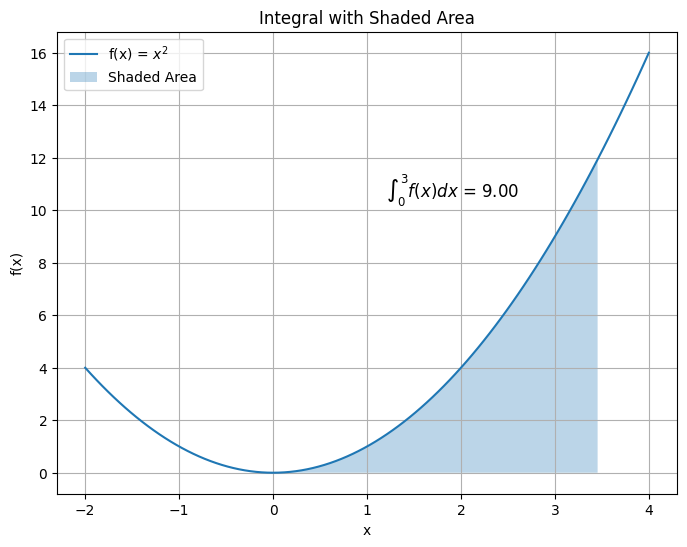

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return x**2

# Define the integration limits
a = 0
b = 2

# Calculate the integral and its value
integral_value, _ = quad(f, 0, 3)

# Generate x values for plotting
x = np.linspace(a-2, b+2, 100)
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the function curve
plt.plot(x, y, label='f(x) = $x^2$')

# Fill the shaded area under the curve
plt.fill_between(x, y, alpha=0.3, label='Shaded Area',
                 where = (x>0) & (x <=3.5))

# Annotate the integral value
plt.text(1.2, 10.5, f'$\int_0^3 f(x)dx$ = {integral_value:.2f}', fontsize=12, color='black')

# Set labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integral with Shaded Area')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

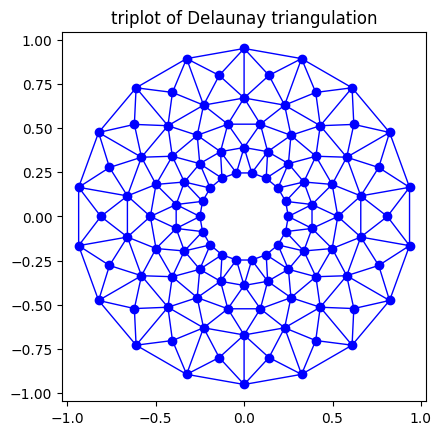

In [28]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# First create the x and y coordinates of the points.
n_angles = 18
n_radii = 6
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')

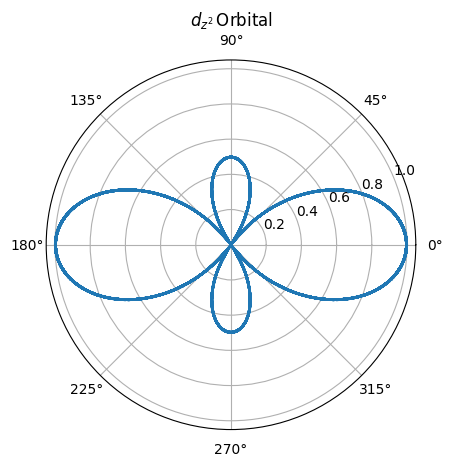

In [32]:
import numpy as np
import math
theta = np.arange(0, 360,0.1)
r = [abs(0.5 * (3 * math.cos(num)**2
-           1)) for num in theta]
plt.polar(theta, r)
plt.title(r'$d_{z^2} \,$' + 'Orbital');

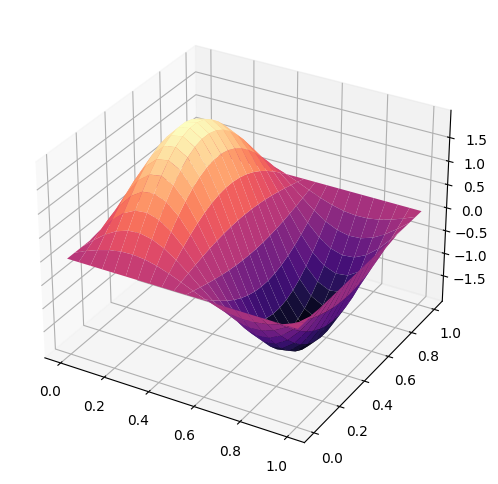

In [33]:
L = 1
nx = 2
ny = 1

x = np.linspace(0, L, 20)
y = np.linspace(0, L, 20)
X, Y = np.meshgrid(x,y)

def wave(x, y):
    psi = (2/L) * np.sin(nx*np.pi*X/L) * np.sin(ny*np.pi*Y/L)
    return psi

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, wave(X, Y), cmap='magma');

# Interactive Plots with Plotly

This is a python package that will make all figures you produce interactive.

In [38]:
import json
import urllib.request as urlreq
from dash import Dash, html, Input, Output, callback
import dash_bio as dashbio

app = Dash(__name__)


model_data = urlreq.urlopen(
    'https://git.io/mol2d_buckminsterfullerene.json'
).read().decode('utf-8')

model_data = json.loads(model_data)

app.layout = html.Div([
    dashbio.Molecule2dViewer(
        id='dashbio-default-molecule2d',
        modelData=model_data
    ),
    html.Hr(),
    html.Div(id='default-molecule2d-output')
])

@callback(
    Output('default-molecule2d-output', 'children'),
    Input('dashbio-default-molecule2d', 'selectedAtomIds')
)
def update_selected_atoms(ids):
    if ids is None or len(ids) == 0:
        return "No atom has been selected. Select atoms by clicking on them."
    return "Selected atom IDs: {}.".format(', '.join([str(i) for i in ids]))

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>